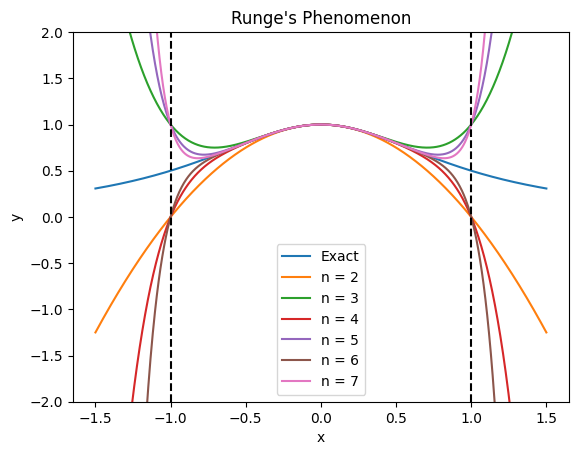

In [23]:
"""agnesi_witch.ipynb"""
# Cell 1

from __future__ import annotations
import typing
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import math
if typing.TYPE_CHECKING:
    from matplotlib.axes import Axes
    from numpy.typing import NDArray

# Referenced Dr. Biersach's code
def p_series(x: float, n: int) -> float:
    y: float = 0
    for i in range(n):
        y += (-(x**2))**i
    return y

def plot(ax: Axes) -> None:
    """Plot Witch of Agnesi (power series terms 2-7)"""
    domain: NDArray[np.float_] = np.linspace(-1.5, 1.5, 1000)
    exact: NDArray[np.float_] = 1 / (domain**2 + 1)

    ax.plot(domain, exact, label="Exact")

    # Dr. Biersach's code
    p = np.vectorize(p_series, excluded=("n"))
    for i in range(2, 8):
        ax.plot(domain, p(domain, n=i), label=f"n = {i}")

    plt.axvline(x=-1, color="black", linestyle='--')
    plt.axvline(x=1, color="black", linestyle='--')

    ax.set_title("Runge's Phenomenon")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_ylim(-2, 2)
    ax.legend()

plot(plt.axes())

At x = +-i, the function is undefined due to division by zero.

1. Agnesi's Witch quickly diverges from the exact function as we approach x = -1 or x = 1 because as the absolute value of x increases, the values of the coefficients of higher-order terms in the Taylor approximation blow up. This is because higher derivatives tend to have larger values. As we near -1 or 1, we start to leave the "radius of convergence" of the function.
2. The witch function demonstrates this because as we increase the number of terms, the approximations get better when x is close to 0, but worse when x is further from 0. For example, the n = 2 approximation is actually better than the n = 6 approximation at values like x = -1.5.